<a href="https://colab.research.google.com/github/ArtemBurenok/Machine_Learning_Course/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X, y = data.drop(['target'], axis=1), data['target']

**Задание 1.**

 Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

In [ ]:
class Log_Reg:
    def __init__(self, alpha=0.1):
        self.alpha = alpha

    def get_sigmoid(self, input):
        return (1 / (1 + np.exp(-input)))

    def get_loss(self, y_hat, y, n):
        return - (1 / n) * (np.sum(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat)))

    def update_params(self, n, X, y_hat, y, weight_old):
        different = y_hat - y
        update = (1 / n) * np.dot(X.T, different.T)

        weight_new = weight_old - self.alpha * update.T

        return weight_new

    def train_logistic_regression(self, X, y, epochs = 1000):
        n = len(X)

        weights = np.random.rand(1,X.shape[1])
        losses = []

        for i in range(epochs):
            y_hat = self.get_sigmoid(np.dot(X, weights.T)).reshape((1, -1))

            loss = self.get_loss(y_hat, y, n)
            losses.append(loss)

            weights = self.update_params(n, X, y_hat, y, weights)

        return weights, y_hat, losses

    def predict_logistic_regression(self, weights, X, threshold=0.5):
        product = np.dot(X, weights.T)
        y_preds = self.get_sigmoid(product)

        return [1 if i >= threshold else 0 for i in y_preds]

In [ ]:
logistic_regression = Log_Reg(alpha=0.1)

In [ ]:
params = logistic_regression.train_logistic_regression(np.array(X), np.array(y), 10000)

<ipython-input-5-ccaaa00304dd>:9: RuntimeWarning: divide by zero encountered in log
  return - (1 / n) * (np.sum(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat)))
<ipython-input-5-ccaaa00304dd>:9: RuntimeWarning: invalid value encountered in multiply
  return - (1 / n) * (np.sum(y * (np.log(y_hat)) + (1 - y) * np.log(1 - y_hat)))
<ipython-input-5-ccaaa00304dd>:6: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-input)))


In [ ]:
labels = np.array([np.int32(y_hat) for y_hat in params[1]])

In [ ]:
print(f"Accuracy: {accuracy_score(labels[0], np.array(y))}")

Accuracy: 0.6078048780487805


**Задание 2.**

Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target).


Уже сделано

**Задание 3.**

Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
np.sum(data.isna(), axis=0)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Задание 4.**

Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
first_group, second_group = [], []

for col in data.columns:
    shape = data[col].value_counts().shape[0]
    print(f"{col}: {shape}")

    if shape < 20:
        first_group.append(col)
    else:
        second_group.append(col)

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


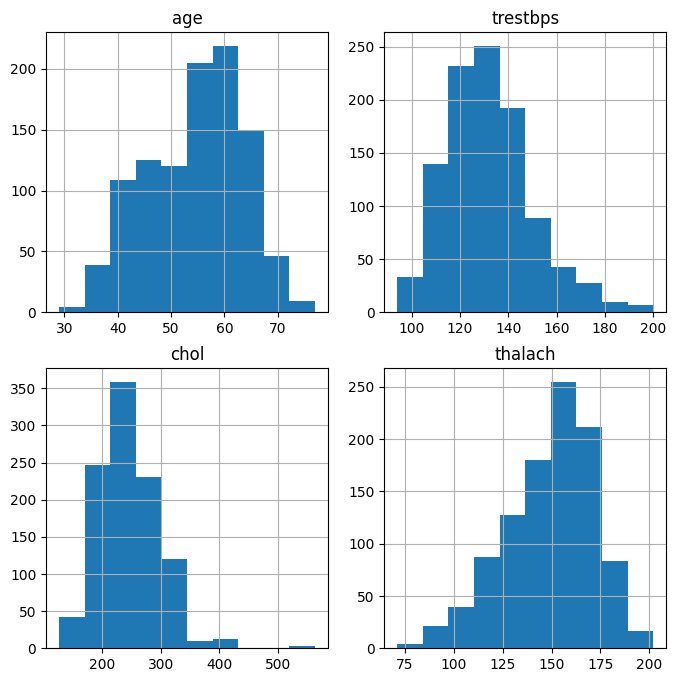

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.hist(data[second_group[0]])
plt.title(second_group[0])
plt.grid()

plt.subplot(2, 2, 2)
plt.hist(data[second_group[1]])
plt.title(second_group[1])
plt.grid()

plt.subplot(2, 2, 3)
plt.hist(data[second_group[2]])
plt.title(second_group[2])
plt.grid()

plt.subplot(2, 2, 4)
plt.hist(data[second_group[3]])
plt.title(second_group[3])
plt.grid()

plt.show()

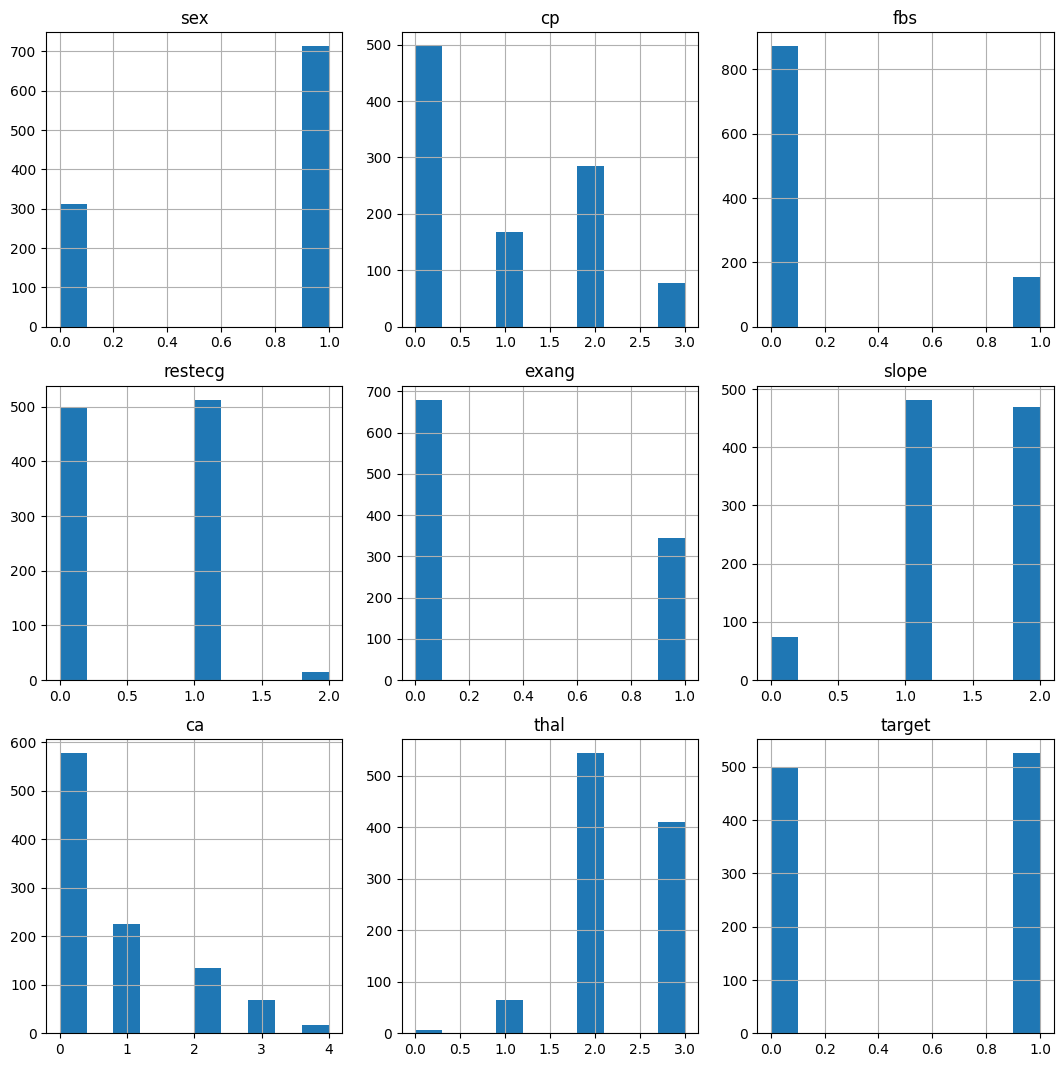

In [ ]:
plt.figure(figsize=(13, 13))

for i in range(len(first_group)):
    plt.subplot(len(first_group) // 3, len(first_group) // 3, i + 1)
    plt.hist(data[first_group[i]])
    plt.title(first_group[i])
    plt.grid()

plt.show()

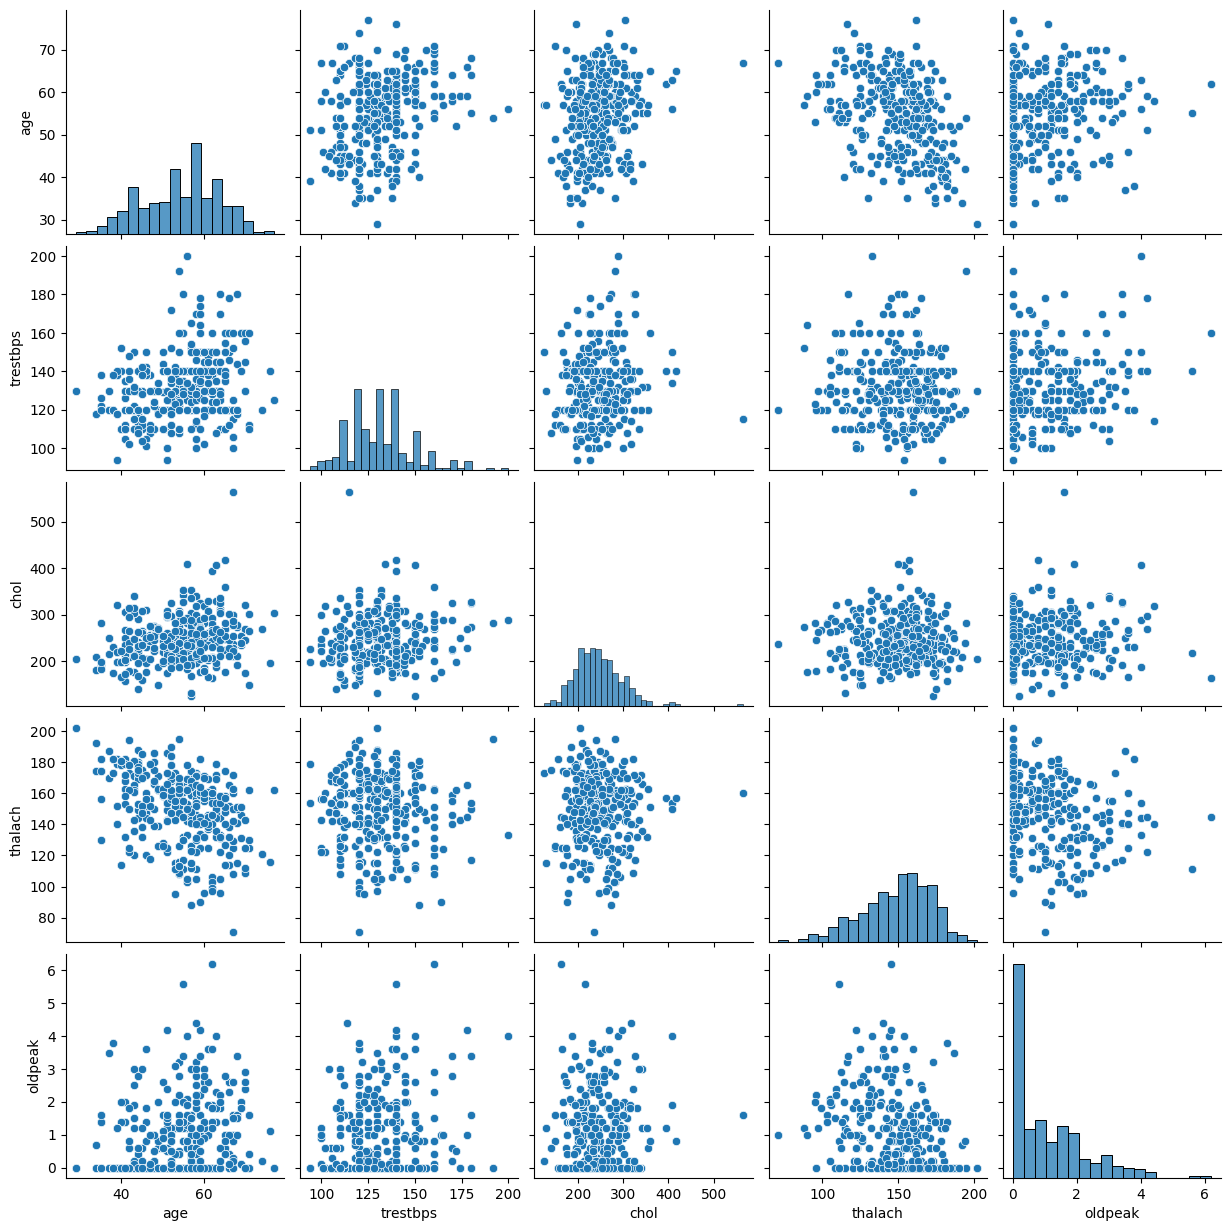

In [ ]:
sns.pairplot(data[second_group])
plt.show()

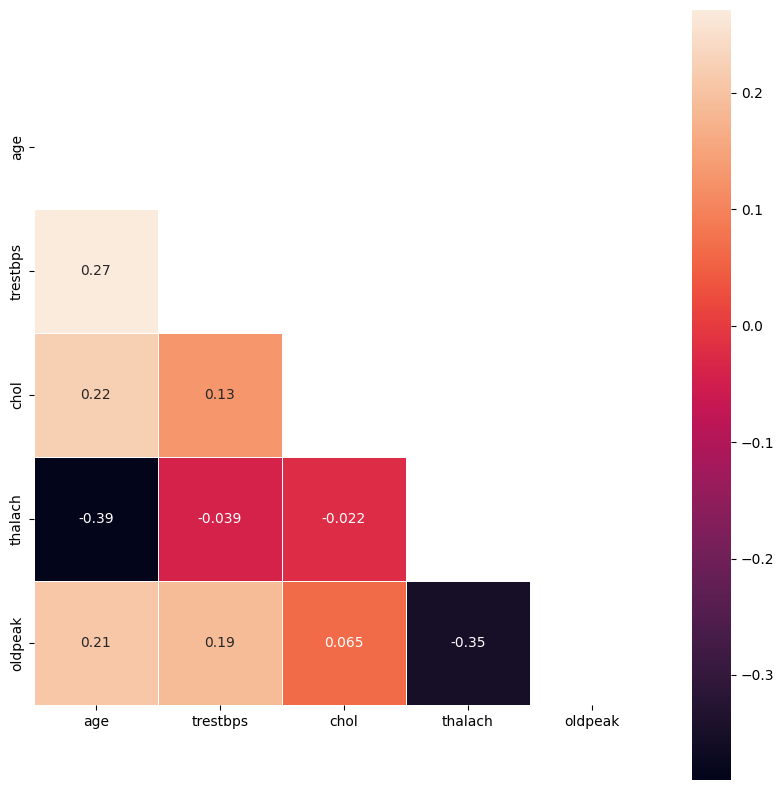

In [ ]:
corr = data[second_group].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

Выводы
    
* корреляция между признаками маленькая
* данные распределены нормально
* данные сбалансированы

**Задание 5.**

При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).


Уберём ненужные признаки

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
f_statistic, p_value = f_classif(X, y)

In [ ]:
importance_list = []

for i in range(len(X.columns)):
    if p_value[i] < 0.05:
        importance_list.append(X.columns[i])
        print(f"Признак {X.columns[i]} значим")
    else:
        print(f"Признак {X.columns[i]} не значим")

Признак age значим
Признак sex значим
Признак cp значим
Признак trestbps значим
Признак chol значим
Признак fbs не значим
Признак restecg значим
Признак thalach значим
Признак exang значим
Признак oldpeak значим
Признак slope значим
Признак ca значим
Признак thal значим


In [ ]:
X_new = X[importance_list]

**Задание 6.**

Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

Сделаем масштабирование

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in second_group:
    scaler = StandardScaler()
    X_new[col] = scaler.fit_transform(X_new[col].values.reshape(-1, 1))

<ipython-input-24-a86be5e21fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[col] = scaler.fit_transform(X_new[col].values.reshape(-1, 1))
<ipython-input-24-a86be5e21fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[col] = scaler.fit_transform(X_new[col].values.reshape(-1, 1))
<ipython-input-24-a86be5e21fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_new

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,1,0.821321,0,-0.060888,2,2,3
1,-0.158157,1,0,0.479107,-0.833861,0,0.255968,1,1.727137,0,0,3
2,1.716595,1,0,0.764688,-1.396233,1,-1.048692,1,1.301417,0,0,3
3,0.724079,1,0,0.936037,-0.833861,1,0.516900,0,-0.912329,2,1,3
4,0.834359,0,0,0.364875,0.930822,1,-1.874977,0,0.705408,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,1,0.647366,1,-0.912329,2,0,2
1021,0.613800,1,0,-0.377636,0.232705,0,-0.352873,1,1.471705,1,1,3
1022,-0.819834,1,0,-1.234378,0.562371,0,-1.353113,1,-0.060888,1,1,2
1023,-0.488996,0,0,-1.234378,0.155137,0,0.429923,0,-0.912329,2,0,2


Подобрать гиперпараметры

In [ ]:
from sklearn.metrics import accuracy_score
import itertools

In [ ]:
logistic_regression = Log_Reg(alpha=1)
params = logistic_regression.train_logistic_regression(np.array(X_new), np.array(y), 1500)

In [ ]:
labels = np.array([np.int32(y_hat) for y_hat in params[1]])

In [ ]:
print(f"Accuracy: {accuracy_score(labels[0], np.array(y))}")

Accuracy: 0.4868292682926829


Таким образом, оптимальные гиперпараметры: alpha=1 и iteration=1500.

**Задание 7.**

 Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

Разделим данные на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

Перейдём к обучению

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Logistic Regression

In [ ]:
grid_param = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ["l1", "l2"]
}

In [ ]:
log_reg = LogisticRegression()

grid_search_LR = GridSearchCV(log_reg, param_grid=grid_param,
                           n_jobs=-1, cv=4, return_train_score=True,
                           scoring='accuracy')

In [ ]:
grid_search_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_LR.best_estimator_

LogisticRegression(C=0.3593813663804626)

In [ ]:
grid_search_LR.best_score_

0.8521880819366853

In [ ]:
grid_search_LR.best_estimator_.score(X_test, y_test)

0.8116883116883117

In [ ]:
y_prediction_LR = grid_search_LR.best_estimator_.predict(X_test)

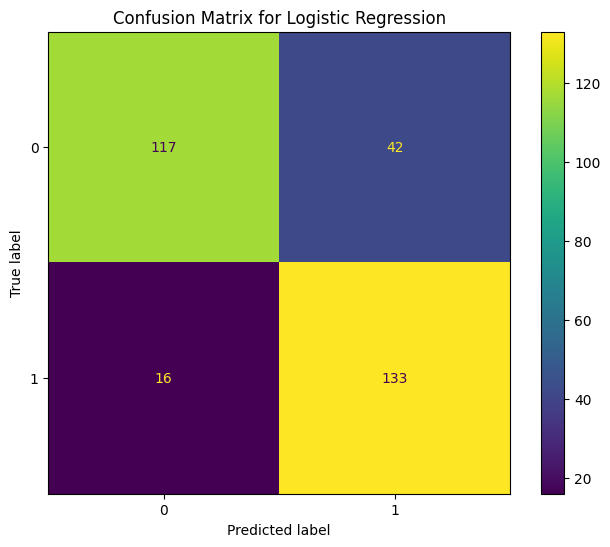

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_LR), display_labels=grid_search_LR.best_estimator_.classes_)
ax.set(title='Confusion Matrix for Logistic Regression')

display.plot(ax=ax);

Support Vector Machine

In [ ]:
grid_param_svm = {
    'C': np.linspace(0, 10, 20)
}

In [ ]:
svm = SVC()

grid_search_svm = GridSearchCV(svm, param_grid=grid_param_svm,
                           n_jobs=-1, cv=4, return_train_score=True,
                           scoring='accuracy')

In [ ]:
grid_search_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_svm.best_estimator_

SVC(C=7.894736842105263)

In [ ]:
grid_search_svm.best_score_

0.9288795779019243

In [ ]:
grid_search_svm.best_estimator_.score(X_test, y_test)

0.9383116883116883

In [ ]:
y_prediction_svm = grid_search_svm.best_estimator_.predict(X_test)

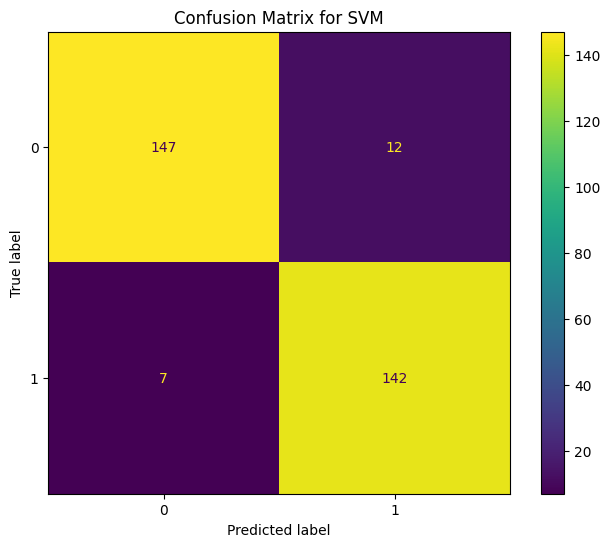

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_svm), display_labels=grid_search_svm.best_estimator_.classes_)
ax.set(title='Confusion Matrix for SVM')

display.plot(ax=ax);

K Neighbors

In [ ]:
grid_param_knn = {
    'n_neighbors': list(range(1, 11))
}

In [ ]:
knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid=grid_param_knn,
                           n_jobs=-1, cv=4, return_train_score=True,
                           scoring='accuracy')

In [ ]:
grid_search_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [ ]:
grid_search_knn.best_score_

0.9595670391061452

In [ ]:
grid_search_knn.best_estimator_.score(X_test, y_test)

0.9805194805194806

In [ ]:
y_prediction_knn = grid_search_knn.best_estimator_.predict(X_test)

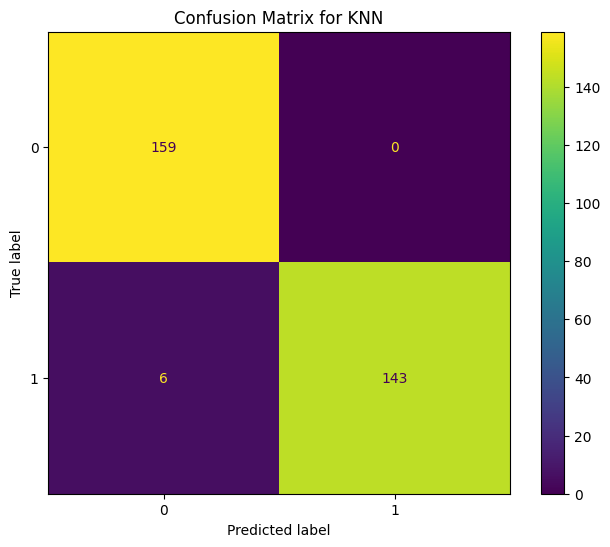

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_knn), display_labels=grid_search_knn.best_estimator_.classes_)
ax.set(title='Confusion Matrix for KNN')

display.plot(ax=ax)

Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
clf.score(X_train, y_train)

0.8493723849372385

In [ ]:
clf.score(X_test, y_test)

0.8051948051948052

In [ ]:
y_prediction_clf = clf.predict(X_test)

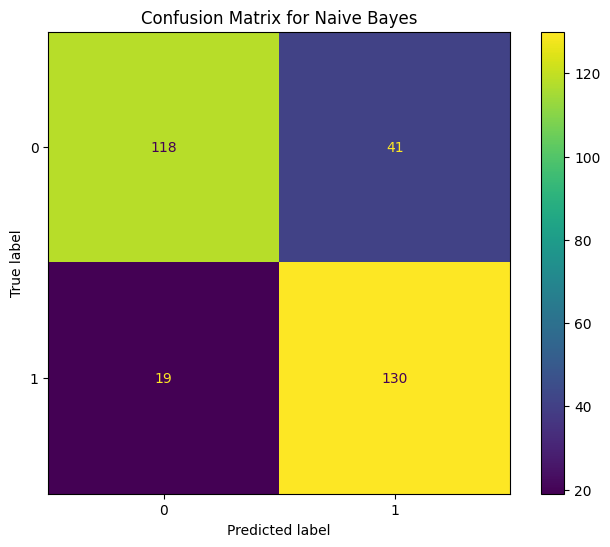

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_clf), display_labels=clf.classes_)
ax.set(title='Confusion Matrix for Naive Bayes')

display.plot(ax=ax);

DecisionTreeClassifier

In [ ]:
grid_param_tree = {
    'max_depth': list(range(5, 21)),
    "min_samples_leaf": list(range(1, 6))
}

In [ ]:
tree = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(tree, param_grid=grid_param_tree,
                           n_jobs=-1, cv=4, return_train_score=True,
                           scoring='accuracy')

In [ ]:
grid_search_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=11)

In [ ]:
grid_search_tree.best_score_

0.9693047796399752

In [ ]:
grid_search_tree.best_estimator_.score(X_test, y_test)

0.9707792207792207

In [ ]:
y_prediction_tree = grid_search_tree.best_estimator_.predict(X_test)

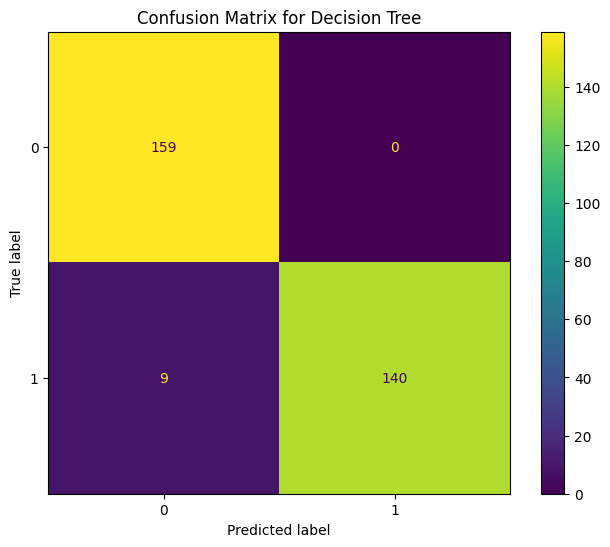

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction_tree), display_labels=grid_search_tree.best_estimator_.classes_)
ax.set(title='Confusion Matrix for Decision Tree')

display.plot(ax=ax);

**Задание 8.**

Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [ ]:
def cross_validation_analtsis(model, X_train, y_train, X_test, y_test):
    scores = cross_validate(model, X_train, y_train, scoring=['accuracy', "recall", "precision", "f1", 'roc_auc'], cv=5)
    scores_test = cross_validate(model, X_test, y_test, scoring=['accuracy', "recall", "precision", "f1", 'roc_auc'], cv=5)

    data_array = np.array([
        scores['test_accuracy'], scores_test['test_accuracy'],
        scores['test_recall'], scores_test['test_recall'],
        scores['test_precision'], scores_test['test_precision'],
        scores['test_f1'], scores_test['test_f1'],
        scores['test_roc_auc'], scores_test['test_roc_auc'],
    ])

    return [np.round(digit, 2) for digit in np.mean(data_array, axis=1)]

In [ ]:
models = [
    grid_search_LR.best_estimator_, grid_search_svm.best_estimator_,
    grid_search_knn.best_estimator_, clf, grid_search_tree.best_estimator_
]

In [ ]:
data_list = []

for model in models:
    data_list.append(cross_validation_analtsis(model, X_train, y_train, X_test, y_test))

data_list = np.array(data_list).T

In [ ]:
columns_name = ["Log Reg", "SVM", "KNN", "Naive Bayes", "Decision Tree"]
index_name = [
    'train_accuracy', 'test_accuracy',
    'train_recall', 'test_recall',
    'train_precision', 'test_precision',
    'train_f1', 'test_f1',
    'train_roc_auc', 'test_roc_auc',
]

score_data = pd.DataFrame(data_list, columns=columns_name, index=index_name)
score_data

,Log Reg,SVM,KNN,Naive Bayes,Decision Tree
train_accuracy,0.85,0.94,0.95,0.84,0.97
test_accuracy,0.82,0.82,0.86,0.81,0.86
train_recall,0.91,0.96,0.97,0.87,0.98
test_recall,0.85,0.82,0.83,0.87,0.86
train_precision,0.83,0.93,0.95,0.84,0.96
test_precision,0.79,0.82,0.88,0.77,0.86
train_f1,0.87,0.94,0.96,0.85,0.97
test_f1,0.82,0.82,0.86,0.82,0.86
train_roc_auc,0.92,0.96,0.95,0.91,0.97
test_roc_auc,0.91,0.91,0.86,0.89,0.86


Таким образом, дерево решений является ниаболее точной моделью.

**Задание 9.**

(+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

In [ ]:
class K_Nearest_Neighbors_Classifier:
    def __init__(self, X_train, y_train, n_neighbors=5):
        self.X_train, self.y_train = X_train, y_train
        self.n_neighbors = n_neighbors

    def _euclidean_distances(self, x_test):
        return np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))

    def _make_prediction(self, x_test):
        distances = self._euclidean_distances(x_test)
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]

        return np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [ ]:
def metrics_analysis(y_train, y_test, prediction_train, prediction_test):
    accuracy_train = accuracy_score(y_train, prediction_train)
    recall_train = recall_score(y_train, prediction_train)
    precision_train = precision_score(y_train, prediction_train)
    f1_train = f1_score(y_train, prediction_train)
    roc_auc_train = roc_auc_score(y_train, prediction_train)

    accuracy_test = accuracy_score(y_test, prediction_test)
    recall_test = recall_score(y_test, prediction_test)
    precision_test = precision_score(y_test, prediction_test)
    f1_test = f1_score(y_test, prediction_test)
    roc_auc_test = roc_auc_score(y_test, prediction_test)

    metrics = [
        accuracy_train, accuracy_test,
        recall_train, recall_test,
        precision_train, precision_test,
        f1_train, f1_test,
        roc_auc_train, roc_auc_test
    ]

    metrics = list(map(lambda x: np.round(x, 2), metrics))

    return metrics

In [ ]:
KNN = K_Nearest_Neighbors_Classifier(X_train.values, y_train.values)

In [ ]:
prediction_knn_realization_train, prediction_knn_realization_test = KNN.predict(X_train.values), KNN.predict(X_test.values)

In [ ]:
metrics_knn_realization_train = metrics_analysis(y_train, y_test, prediction_knn_realization_train, prediction_knn_realization_test)

In [ ]:
score_data["KNN_realization"] = metrics_knn_realization_train

In [ ]:
score_data

,Log Reg,SVM,KNN,Naive Bayes,Decision Tree,KNN_realization
train_accuracy,0.85,0.94,0.95,0.84,0.97,0.91
test_accuracy,0.82,0.82,0.86,0.81,0.86,0.82
train_recall,0.91,0.96,0.97,0.87,0.98,0.92
test_recall,0.85,0.82,0.83,0.87,0.86,0.86
train_precision,0.83,0.93,0.95,0.84,0.96,0.91
test_precision,0.79,0.82,0.88,0.77,0.86,0.79
train_f1,0.87,0.94,0.96,0.85,0.97,0.92
test_f1,0.82,0.82,0.86,0.82,0.86,0.82
train_roc_auc,0.92,0.96,0.95,0.91,0.97,0.91
test_roc_auc,0.91,0.91,0.86,0.89,0.86,0.82


**Задание 10.**

(+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

[Ссылка на блокнот с реализацией десятого задания](https://colab.research.google.com/drive/1vZBzXfHP75lhu-Tq5rkCvxtOUPd6NI5n?usp=sharing)